# Import important libraries

In [156]:
#import warnings
#warnings.filterwarnings("ignore")

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

## Load the dataset

In [158]:
data = pd.read_csv(r"C:\Users\ubahl\OneDrive\Desktop\wk13 live class\Loan_default.csv")

## Understand the Data

In [159]:
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [160]:
data.tail()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0
255346,ZTH91CGL0B,62,22418,18481,636,113,2,6.73,12,0.48,Bachelor's,Unemployed,Divorced,Yes,No,Education,Yes,0


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [162]:
data.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [163]:
data.shape

(255347, 18)

In [164]:
data.dtypes

LoanID             object
Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education          object
EmploymentType     object
MaritalStatus      object
HasMortgage        object
HasDependents      object
LoanPurpose        object
HasCoSigner        object
Default             int64
dtype: object

In [165]:
data.isnull()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
255343,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
255344,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
255345,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## Data Cleaning

In [166]:
# Check for missing value

data.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

## Visualize Missing Data

<Axes: >

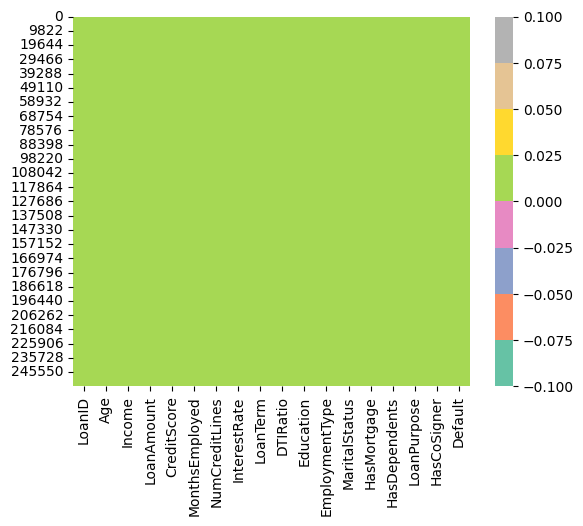

In [167]:
sns.heatmap(data.isna(), cmap="Set2")

<Axes: >

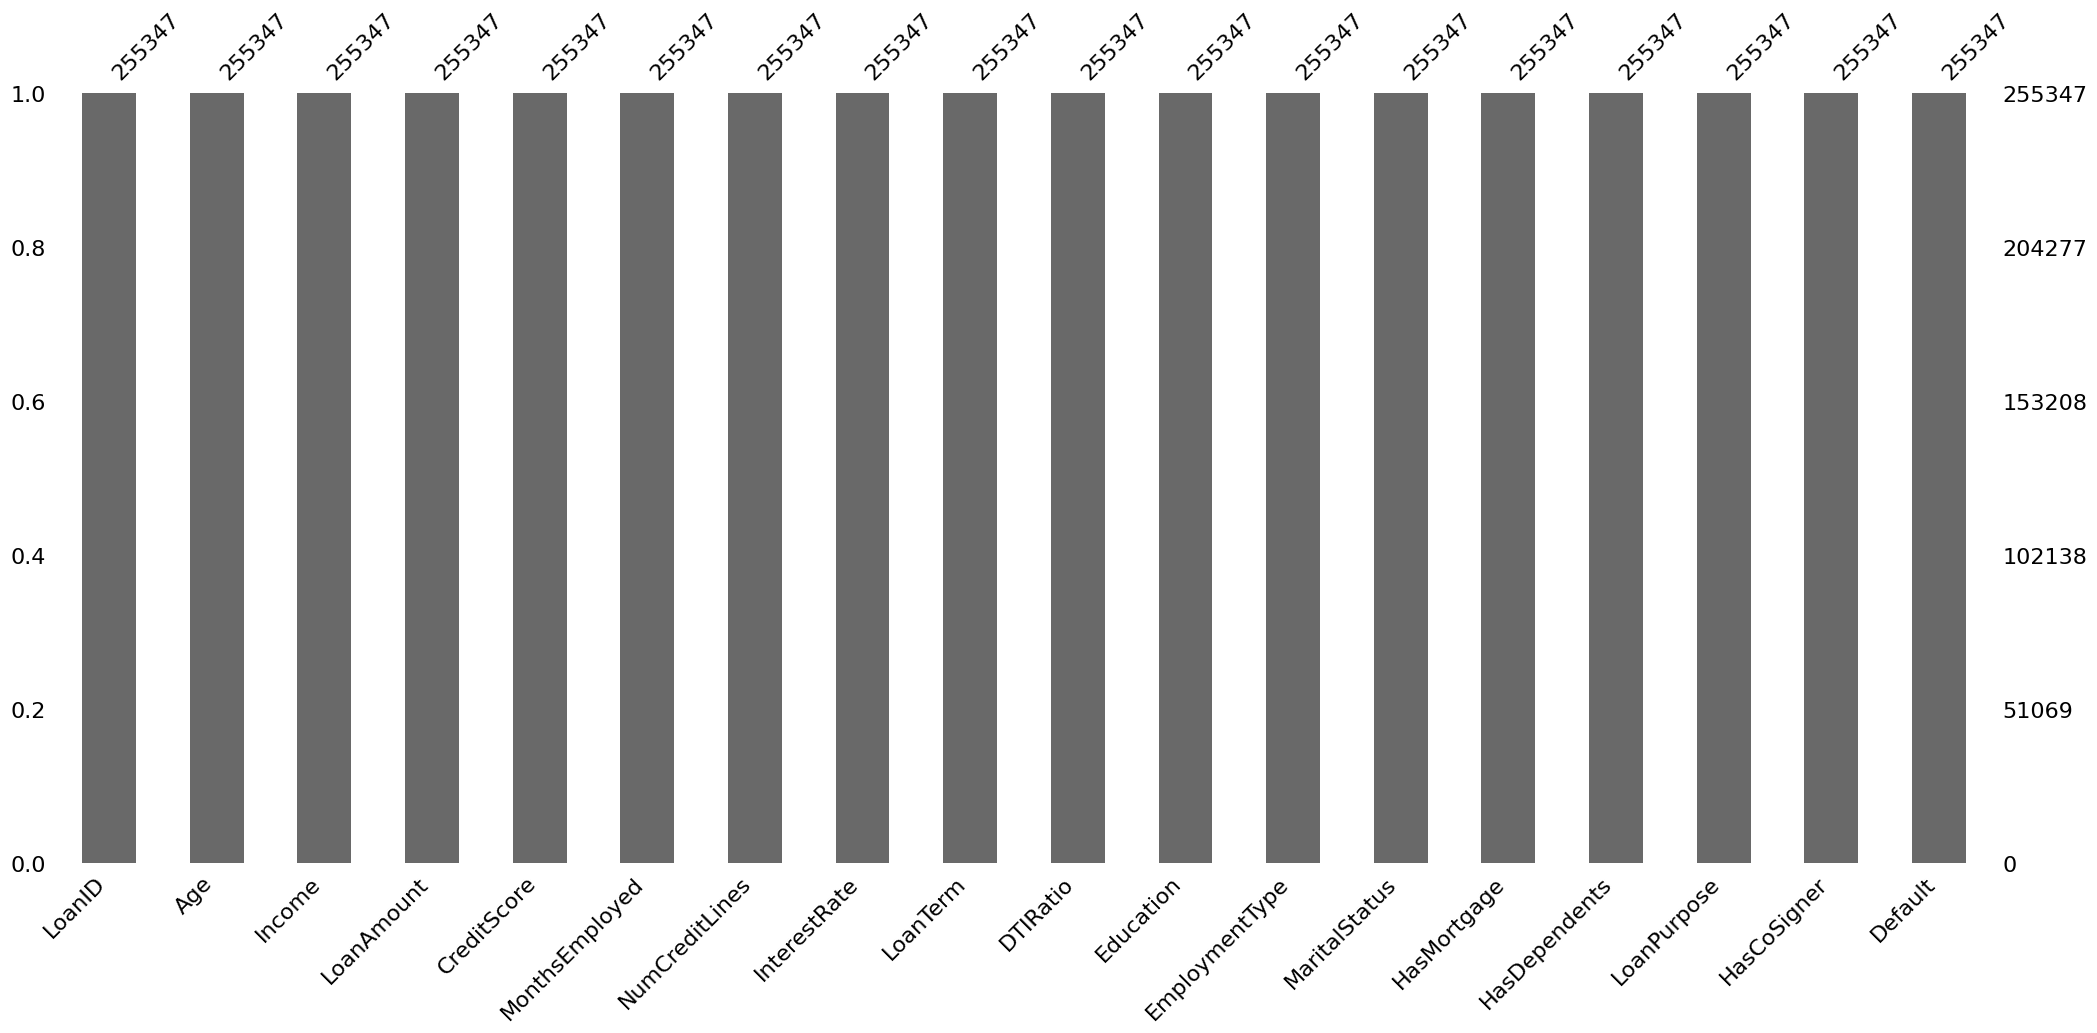

In [168]:
msn.bar(data)

In [169]:
## Handling missing values
# method 1 <====> drop the missing row
data = data.dropna()
# to index to a particular column with the missing value example age, do this
# data = data.["age"],dropna()
# To go further and drop based on the percentage of the missing value
# data = data.dropna(axis=1, thresh=int(0.3*len(data)))

In [170]:
# Method 2 <=====> fill the missing value with the value either mean or median value

# if the missing value is numerical data
# data = data.fillna(data.mean())
# or
# data = data.filna(data.median())

# if it is categorical data, fill with mode
# data = data.fillna(data.mode())

# if the mode is more than 0ne, use below code
# data = data.fillna(data.mode()iloc[0])


## Check for duplicate values

In [171]:
data.duplicated().sum()

0

In [172]:
## Dealing with duplicate value

data = data.drop_duplicates()

## Drop irrelevant columns/Features

In [173]:
data.head(3)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1


In [174]:
data = data.drop(["LoanID"], axis=1)

In [175]:
data.head(3)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1


### Exploratory Data Analysis

In [176]:
## Summary of statistical data

In [177]:
data.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [178]:
# Summary of categorical data

In [179]:
data.describe(include=["object"])

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
count,255347,255347,255347,255347,255347,255347,255347
unique,4,4,3,2,2,5,2
top,Bachelor's,Part-time,Married,Yes,Yes,Business,Yes
freq,64366,64161,85302,127677,127742,51298,127701


## Numerical Exploratory Data Analysis

In [180]:
data.head(3)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1


In [181]:
numerical_df = data.select_dtypes(exclude=["object"])

In [182]:
numerical_df.head(3)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0
1,69,50432,124440,458,15,1,4.81,60,0.68,0
2,46,84208,129188,451,26,3,21.17,24,0.31,1


## Univariate Analysis on Numerical Data

<function matplotlib.pyplot.show(close=None, block=None)>

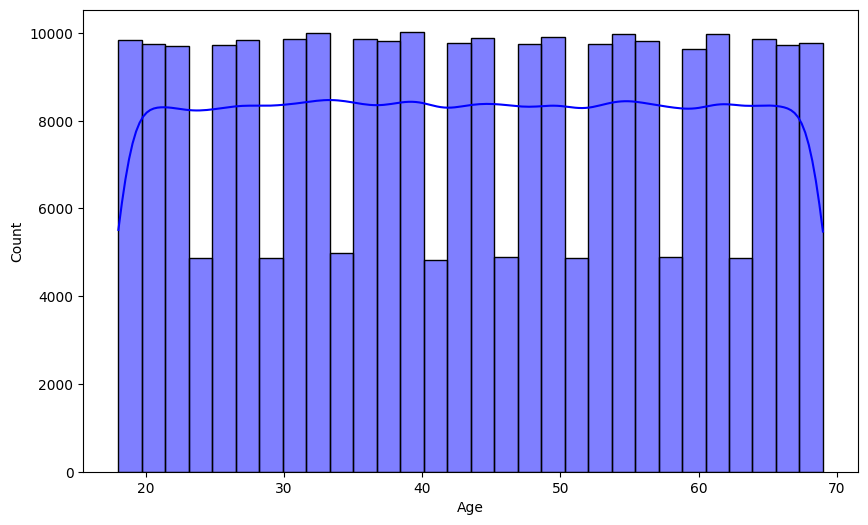

In [183]:
# Analysis individual columns

plt.figure(figsize=(10,6))
sns.histplot(numerical_df["Age"], bins=30, color="blue", kde=True);
plt.show

In [184]:
# Narration: The above plot shows a uniform distribution

<function matplotlib.pyplot.show(close=None, block=None)>

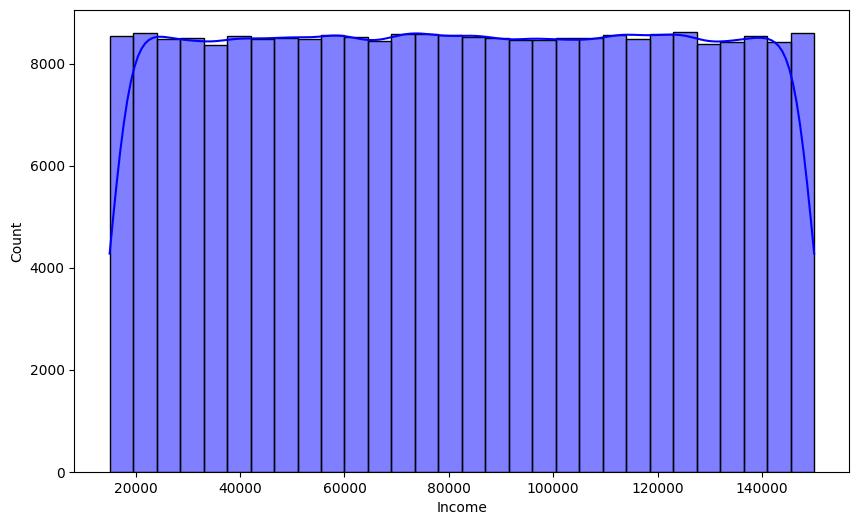

In [185]:
plt.figure(figsize=(10,6))
sns.histplot(numerical_df["Income"], bins=30, color="blue", kde=True);
plt.show

In [186]:
# Narration: The aboe also shows uniform distribution

<function matplotlib.pyplot.show(close=None, block=None)>

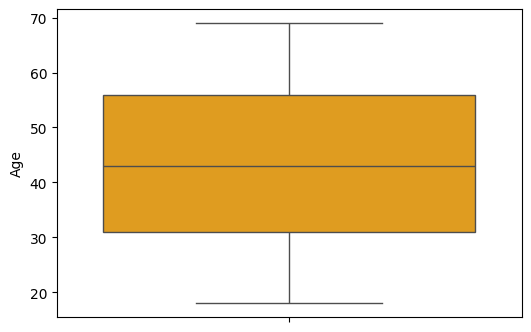

In [187]:
plt.figure(figsize=(6,4))
sns.boxplot(numerical_df["Age"], color="orange");
plt.show

In [188]:
# Narration: The above plot shows that our data is between the age of 31 years to 58 years and there is no outlier.
# The median line means the meadian age of the applicant is around 43 years.

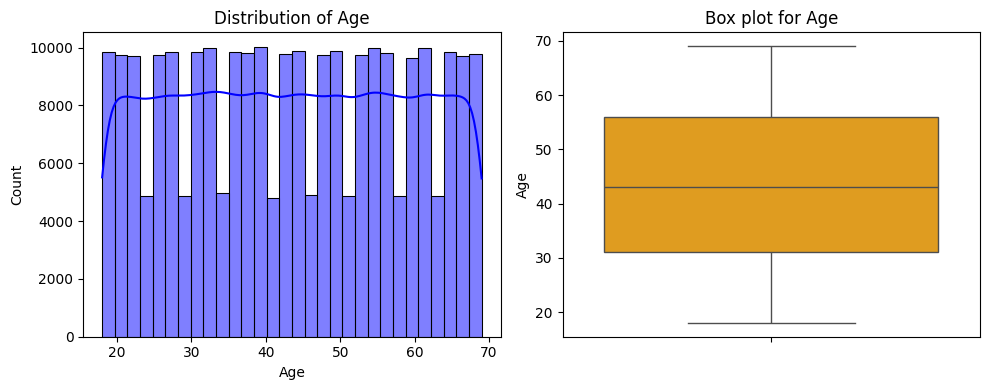

In [189]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
sns.histplot(numerical_df["Age"], bins=30, color="blue", kde=True, ax=axes[0])
axes[0].set_title("Distribution of Age")

sns.boxplot(numerical_df["Age"], color="orange", ax=axes[1])
axes[1].set_title("Box plot for Age")

plt.tight_layout()
plt.show()

In [190]:
# Narration: The chart above confirms we have uniform distribution.

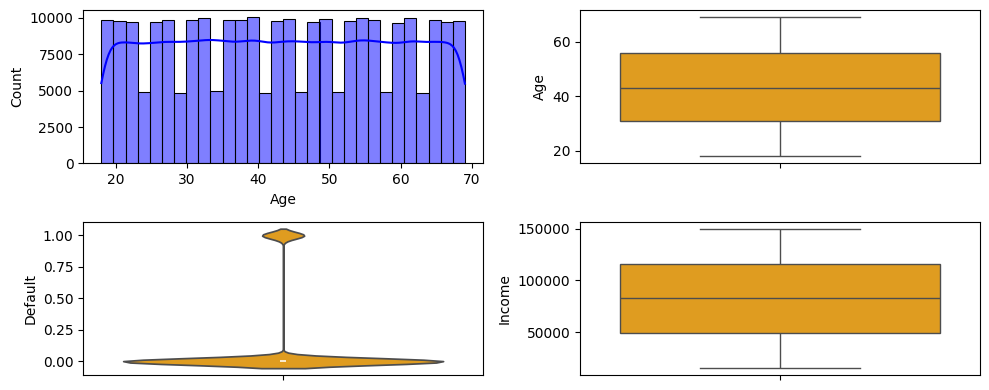

In [191]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 4))

sns.histplot(numerical_df["Age"], bins=30, color="blue", kde=True, ax=axes[0,0])
sns.boxplot(numerical_df["Age"], color="orange", ax=axes[0,1])
sns.violinplot(numerical_df["Default"], color="orange", ax=axes[1,0])
sns.boxplot(numerical_df["Income"], color="orange", ax=axes[1,1])

plt.tight_layout()
plt.show()

In [192]:
# Narration: The default violin plot shows that most of the applicants concentrate on 0 (non-defaulters) than 1

In [193]:
# To get all the column names in a list

numerical_cols = numerical_df.columns.to_list()
numerical_cols

['Age',
 'Income',
 'LoanAmount',
 'CreditScore',
 'MonthsEmployed',
 'NumCreditLines',
 'InterestRate',
 'LoanTerm',
 'DTIRatio',
 'Default']

In [194]:
len(numerical_cols)

10

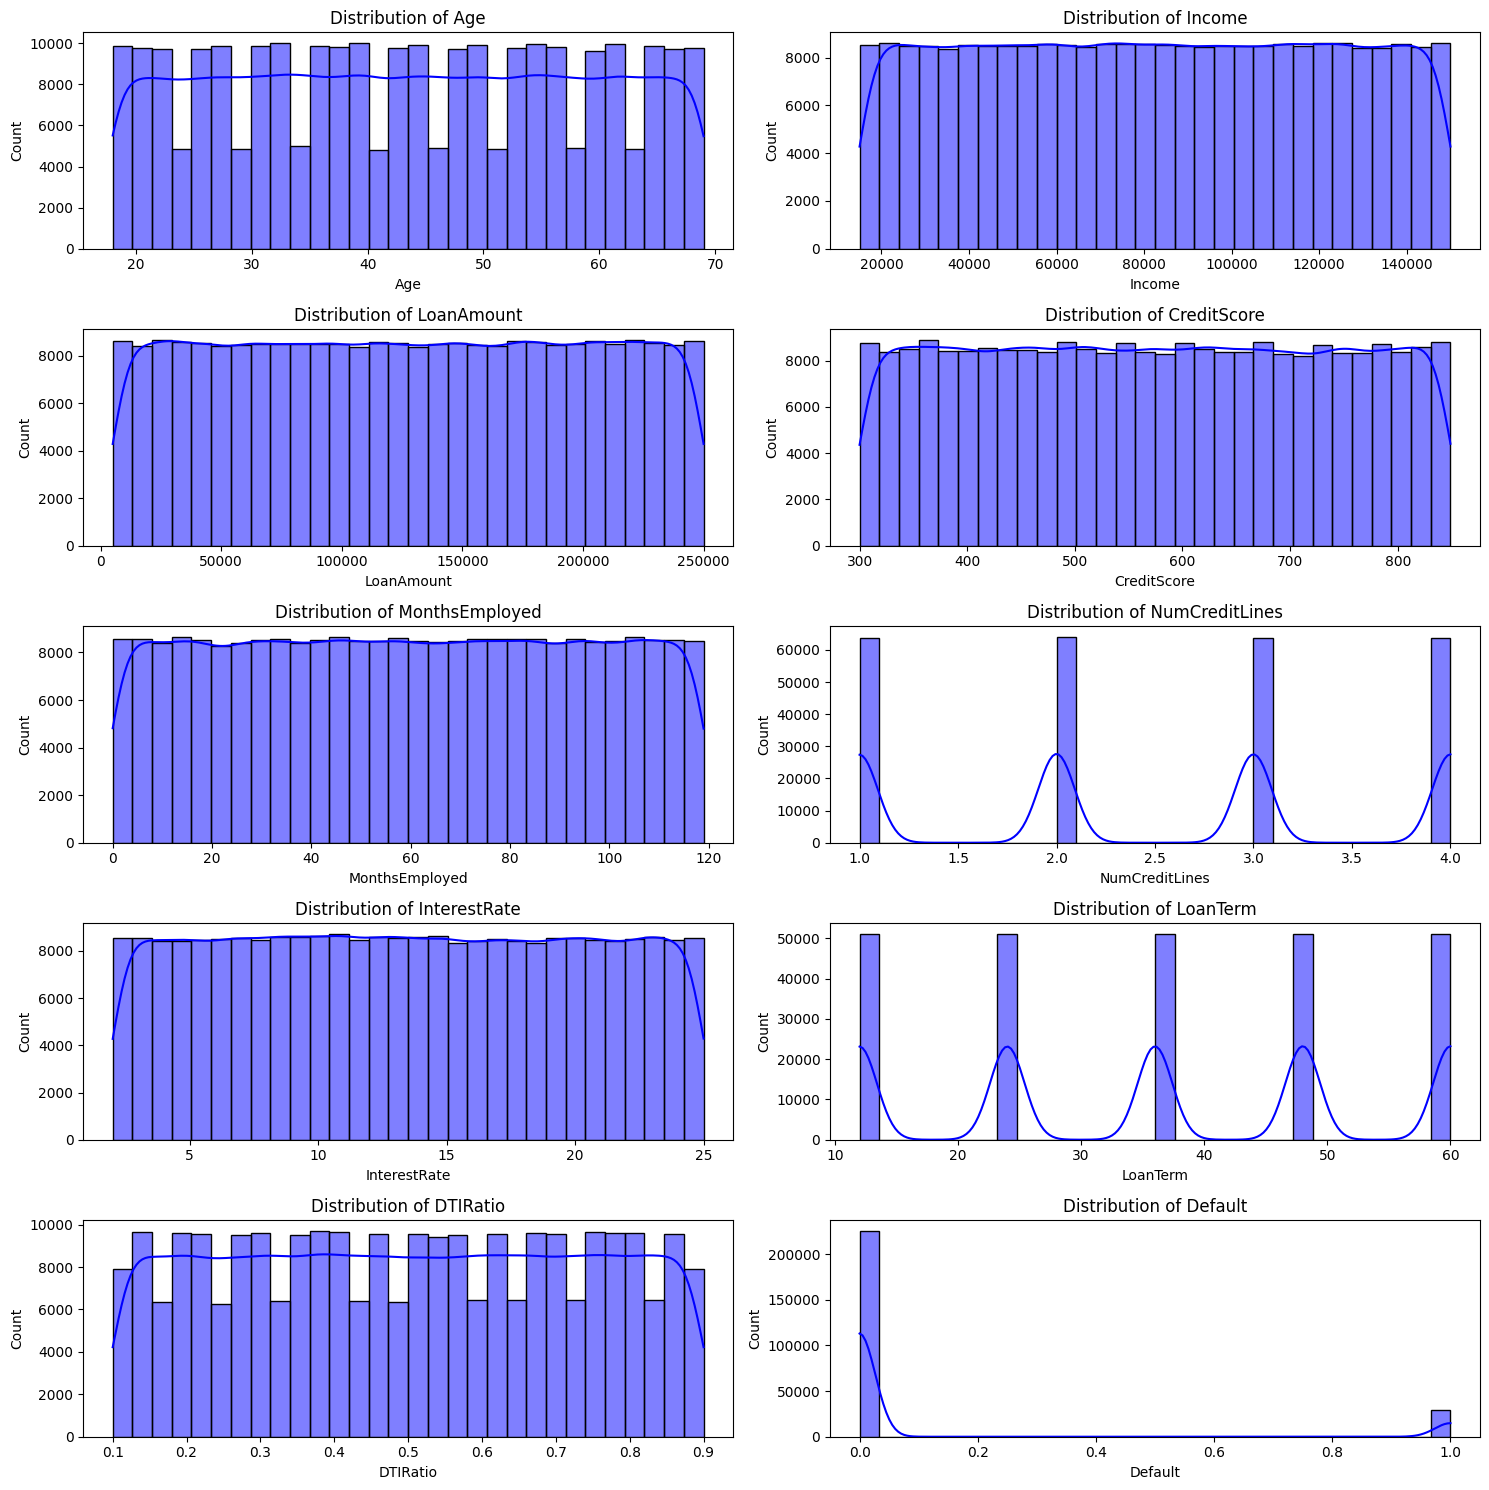

In [195]:
# To visualize all the numerical columns in one ploting

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

position = axes.flatten()

for index, column_name in enumerate(numerical_cols):
    sns.histplot(numerical_df[column_name], bins=30, color="blue", kde=True, ax=position[index])
    position[index].set_title(f"Distribution of {column_name}")
plt.tight_layout()
plt.show()

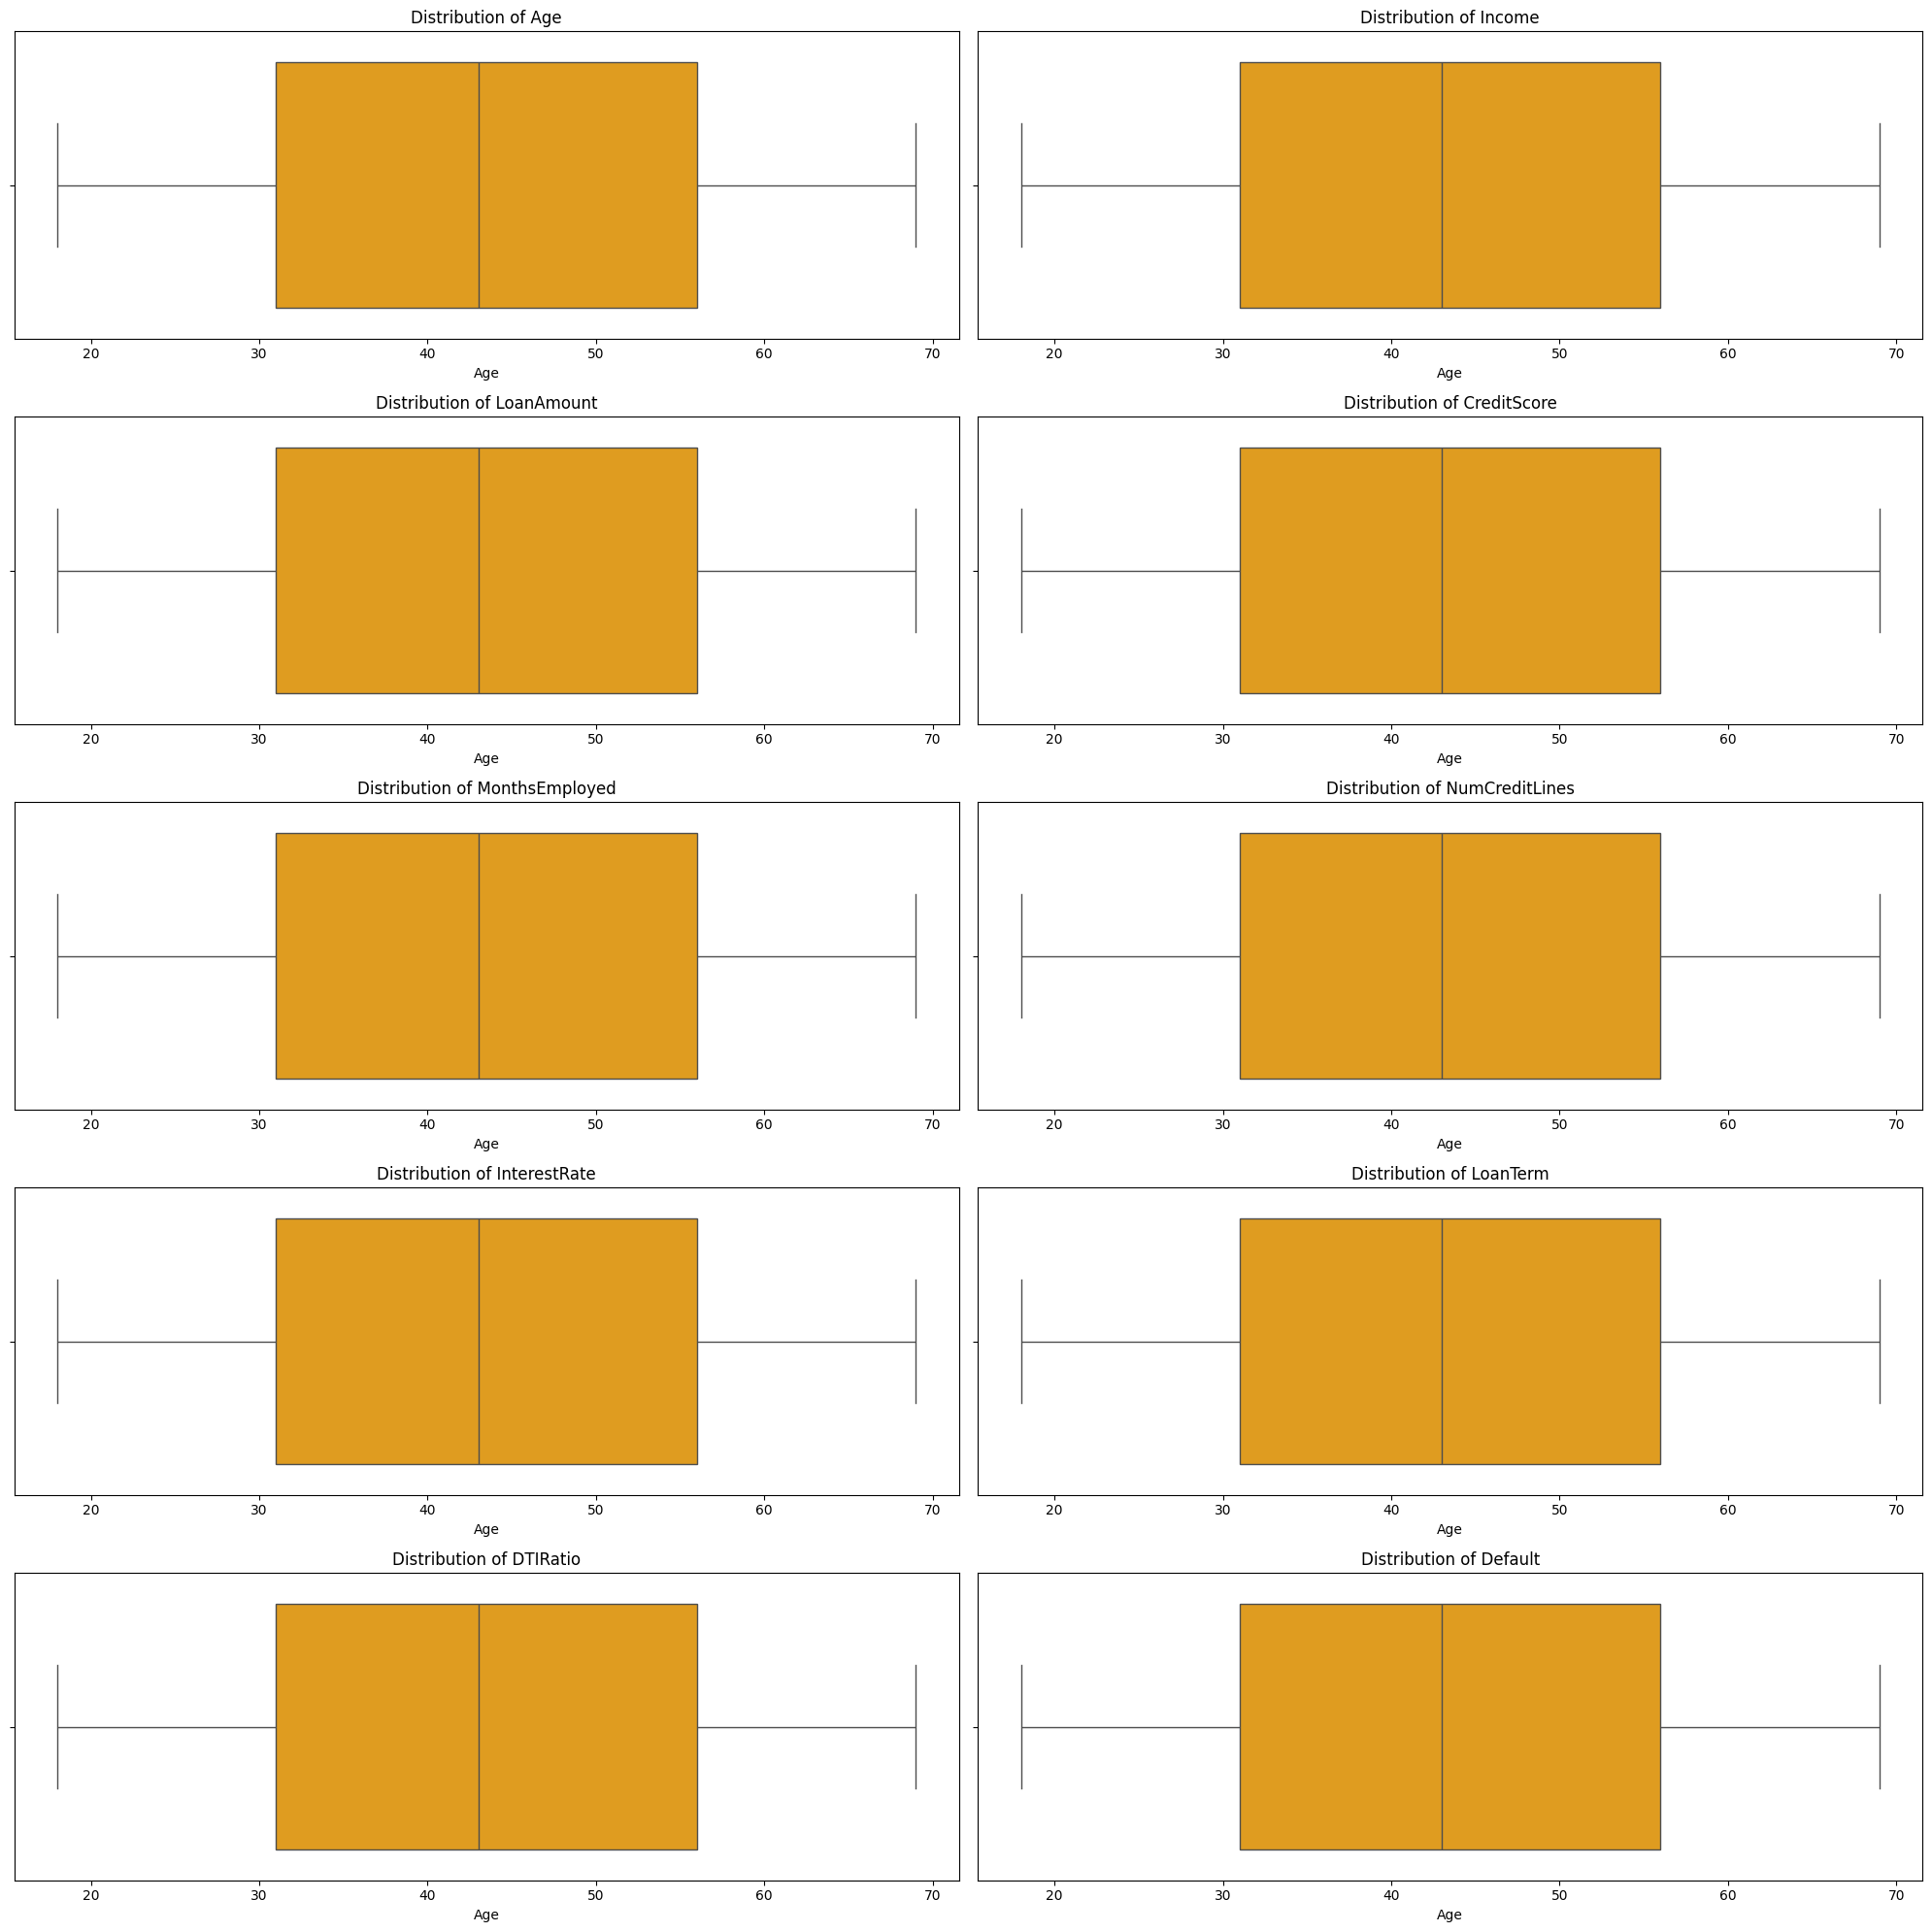

In [196]:
# To visualize all the numerical columns in one ploting

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))

position = axes.flatten()

for index, column_name in enumerate(numerical_cols):
    sns.boxplot(numerical_df["Age"], color="orange", orient="h", ax=position[index])
    position[index].set_title(f"Distribution of {column_name}")
plt.tight_layout()
plt.show()

In [197]:
#To check the number of applicants that can defualt or not
data["Default"].value_counts()

Default
0    225694
1     29653
Name: count, dtype: int64

## Bivariate Analysis

In [198]:
data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [199]:
categorical_df = data.select_dtypes(include="object")

In [200]:
categorical_df.head()

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,Master's,Full-time,Married,No,No,Other,Yes
2,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,High School,Full-time,Married,No,No,Business,No
4,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No


In [201]:
# To check the number of people that answered yes or no in has M0rtgage column

categorical_df["HasMortgage"].value_counts()

HasMortgage
Yes    127677
No     127670
Name: count, dtype: int64

In [202]:
# Narration: here 127,677 applicants answered yes while 127,670 said no

In [203]:
# To check the number of people that answered yes or no in has dependant column

categorical_df["HasDependents"].value_counts()

HasDependents
Yes    127742
No     127605
Name: count, dtype: int64

In [204]:
# Narration: here 127,742 applicants answered yes while 127,605 said no to having dependants

In [205]:
# To check the number of people that answered yes or no in has Credit lines column

data["NumCreditLines"].value_counts()

NumCreditLines
2    64130
3    63834
4    63829
1    63554
Name: count, dtype: int64

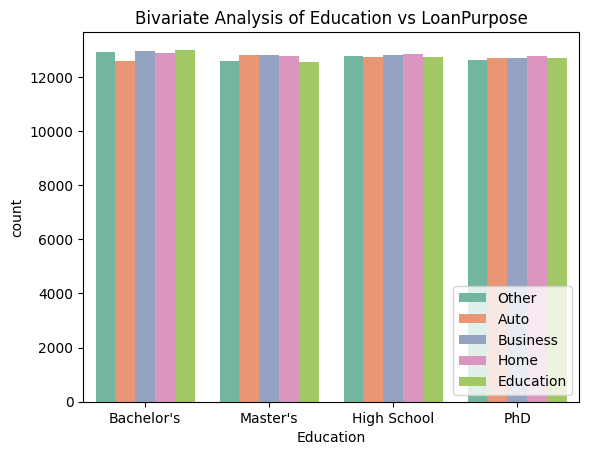

In [206]:
# visualization of categorical data

sns.countplot(x="Education", hue="LoanPurpose", data=categorical_df, palette="Set2")
plt.title(f"Bivariate Analysis of Education vs LoanPurpose")
plt.legend(loc="lower right")
plt.show()

C:\Users\ubahl\AppData\Local\Temp\ipykernel_4580\3691678583.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="MaritalStatus", y="NumCreditLines", data=data, palette="Set2")


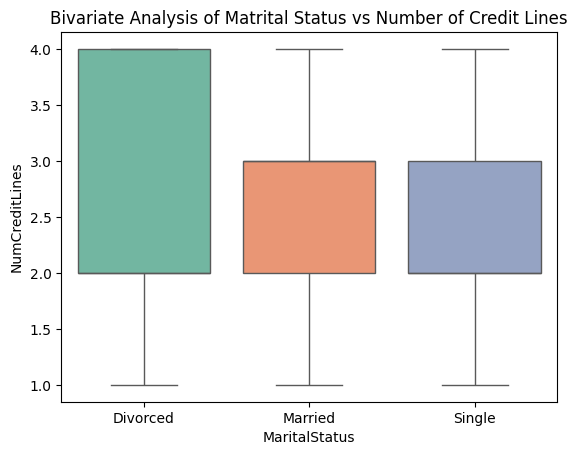

In [207]:
sns.boxplot(x="MaritalStatus", y="NumCreditLines", data=data, palette="Set2")
plt.title(f"Bivariate Analysis of Matrital Status vs Number of Credit Lines")
plt.show()

In [208]:
# Narration: The divorced applicants has between 2 to 4 credit lines while single and married applicants have between 2 to 3 credit lines
# there is possibility of the divorced applicants having more financial responsibilities.

## Correlation Map <===> used to visualize two variables

In [209]:
numerical_df.corr()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
Age,1.000000,-0.001244,-0.002213,-0.000548,-0.000341,-0.000890,-0.001127,0.000263,-0.004689,-0.167783
Income,-0.001244,1.000000,-0.000865,-0.001430,0.002675,-0.002016,-0.002303,-0.000998,0.000205,-0.099119
LoanAmount,-0.002213,-0.000865,1.000000,0.001261,0.002817,0.000794,-0.002291,0.002538,0.001122,0.086659
CreditScore,-0.000548,-0.001430,0.001261,1.000000,0.000613,0.000016,0.000436,0.001130,-0.001039,-0.034166
MonthsEmployed,-0.000341,0.002675,0.002817,0.000613,1.000000,0.001267,0.000096,-0.001166,0.001765,-0.097374
NumCreditLines,-0.000890,-0.002016,0.000794,0.000016,0.001267,1.000000,-0.000297,-0.000226,-0.000586,0.028330
InterestRate,-0.001127,-0.002303,-0.002291,0.000436,0.000096,-0.000297,1.000000,0.000892,0.000575,0.131273
LoanTerm,0.000263,-0.000998,0.002538,0.001130,-0.001166,-0.000226,0.000892,1.000000,0.002273,0.000545
DTIRatio,-0.004689,0.000205,0.001122,-0.001039,0.001765,-0.000586,0.000575,0.002273,1.000000,0.019236
Default,-0.167783,-0.099119,0.086659,-0.034166,-0.097374,0.028330,0.131273,0.000545,0.019236,1.000000


In [210]:
!pip install seaborn --upgrade

In [211]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation Heatmap with Annotations')

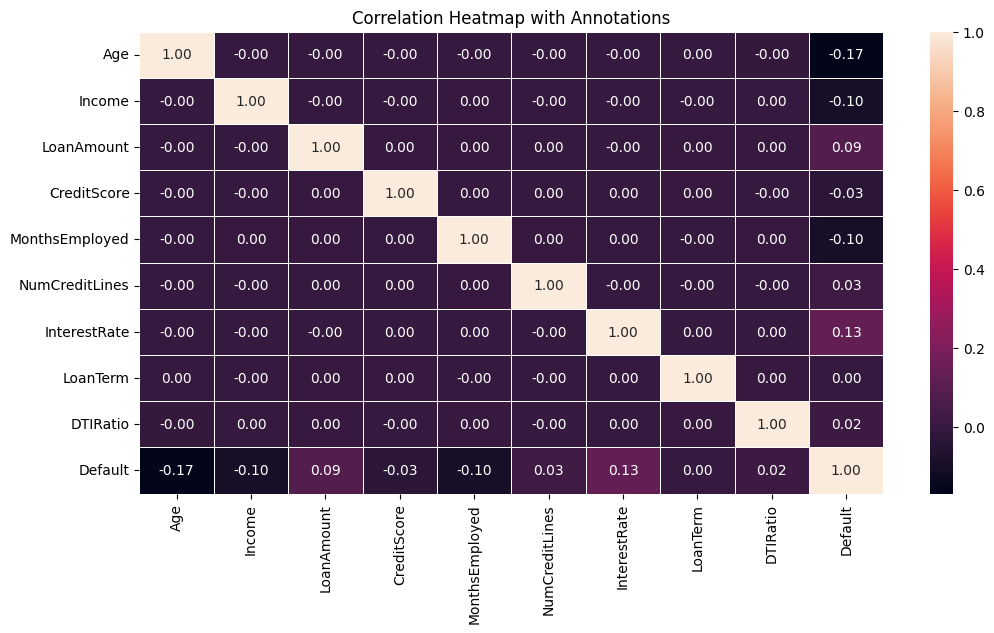

In [212]:
plt.figure(figsize=(12,6))

sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", linewidths=0.5)

# Add a title to the heatmap
plt.title('Correlation Heatmap with Annotations')

## Bivariate Analysis on Categorical Data

<Axes: xlabel='Education', ylabel='count'>

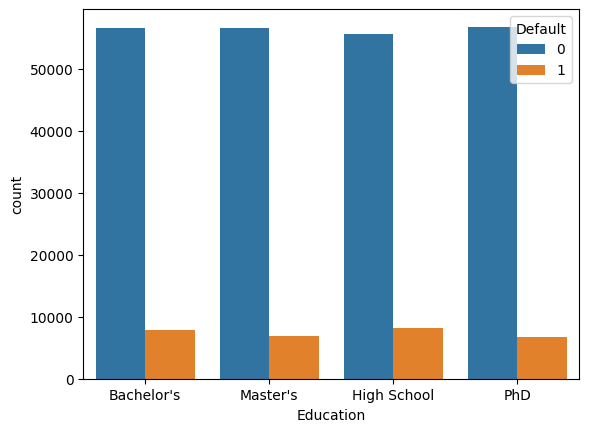

In [213]:
sns.countplot(x="Education", hue="Default", data=data)

## Multivariate Analysis

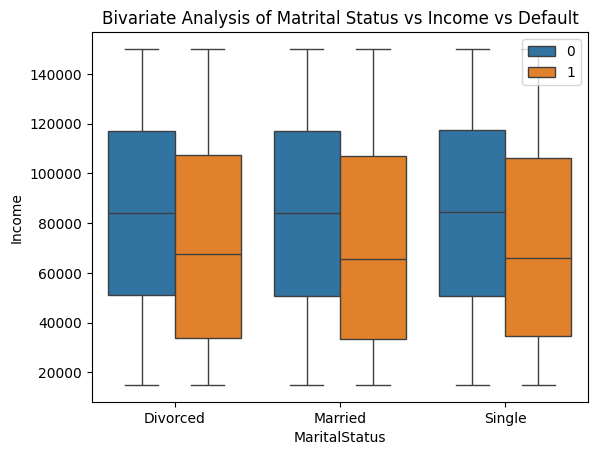

In [214]:
# Here we compare the relationship between more than two variables

sns.boxplot(x="MaritalStatus", y="Income", hue="Default", data=data)
plt.title(f"Bivariate Analysis of Matrital Status vs Income vs Default")
plt.legend(loc="upper right")
plt.show()

In [215]:
# Narration: The median salary of applicant that defaults is 62,000 
# while the median for applicant that does not default is around 82,000

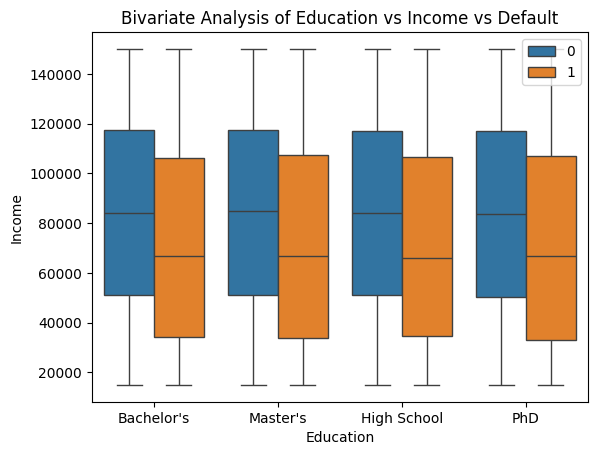

In [216]:
sns.boxplot(x="Education", y="Income", hue="Default", data=data)
plt.title(f"Bivariate Analysis of Education vs Income vs Default")
plt.legend(loc="upper right")
plt.show()

## Categorical Analysis

In [217]:
data["Education"].value_counts()

Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

In [218]:
data.head(3)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1


In [219]:
categorical_df

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,Master's,Full-time,Married,No,No,Other,Yes
2,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,High School,Full-time,Married,No,No,Business,No
4,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No
...,...,...,...,...,...,...,...
255342,Bachelor's,Full-time,Married,No,No,Other,No
255343,High School,Part-time,Divorced,No,No,Home,No
255344,High School,Self-employed,Married,Yes,Yes,Auto,Yes
255345,High School,Part-time,Single,Yes,Yes,Other,No


In [220]:
# To get all the column names in a list

categorical_cols = categorical_df.columns.to_list()
categorical_cols

['Education',
 'EmploymentType',
 'MaritalStatus',
 'HasMortgage',
 'HasDependents',
 'LoanPurpose',
 'HasCoSigner']

In [221]:
len(categorical_cols)

7

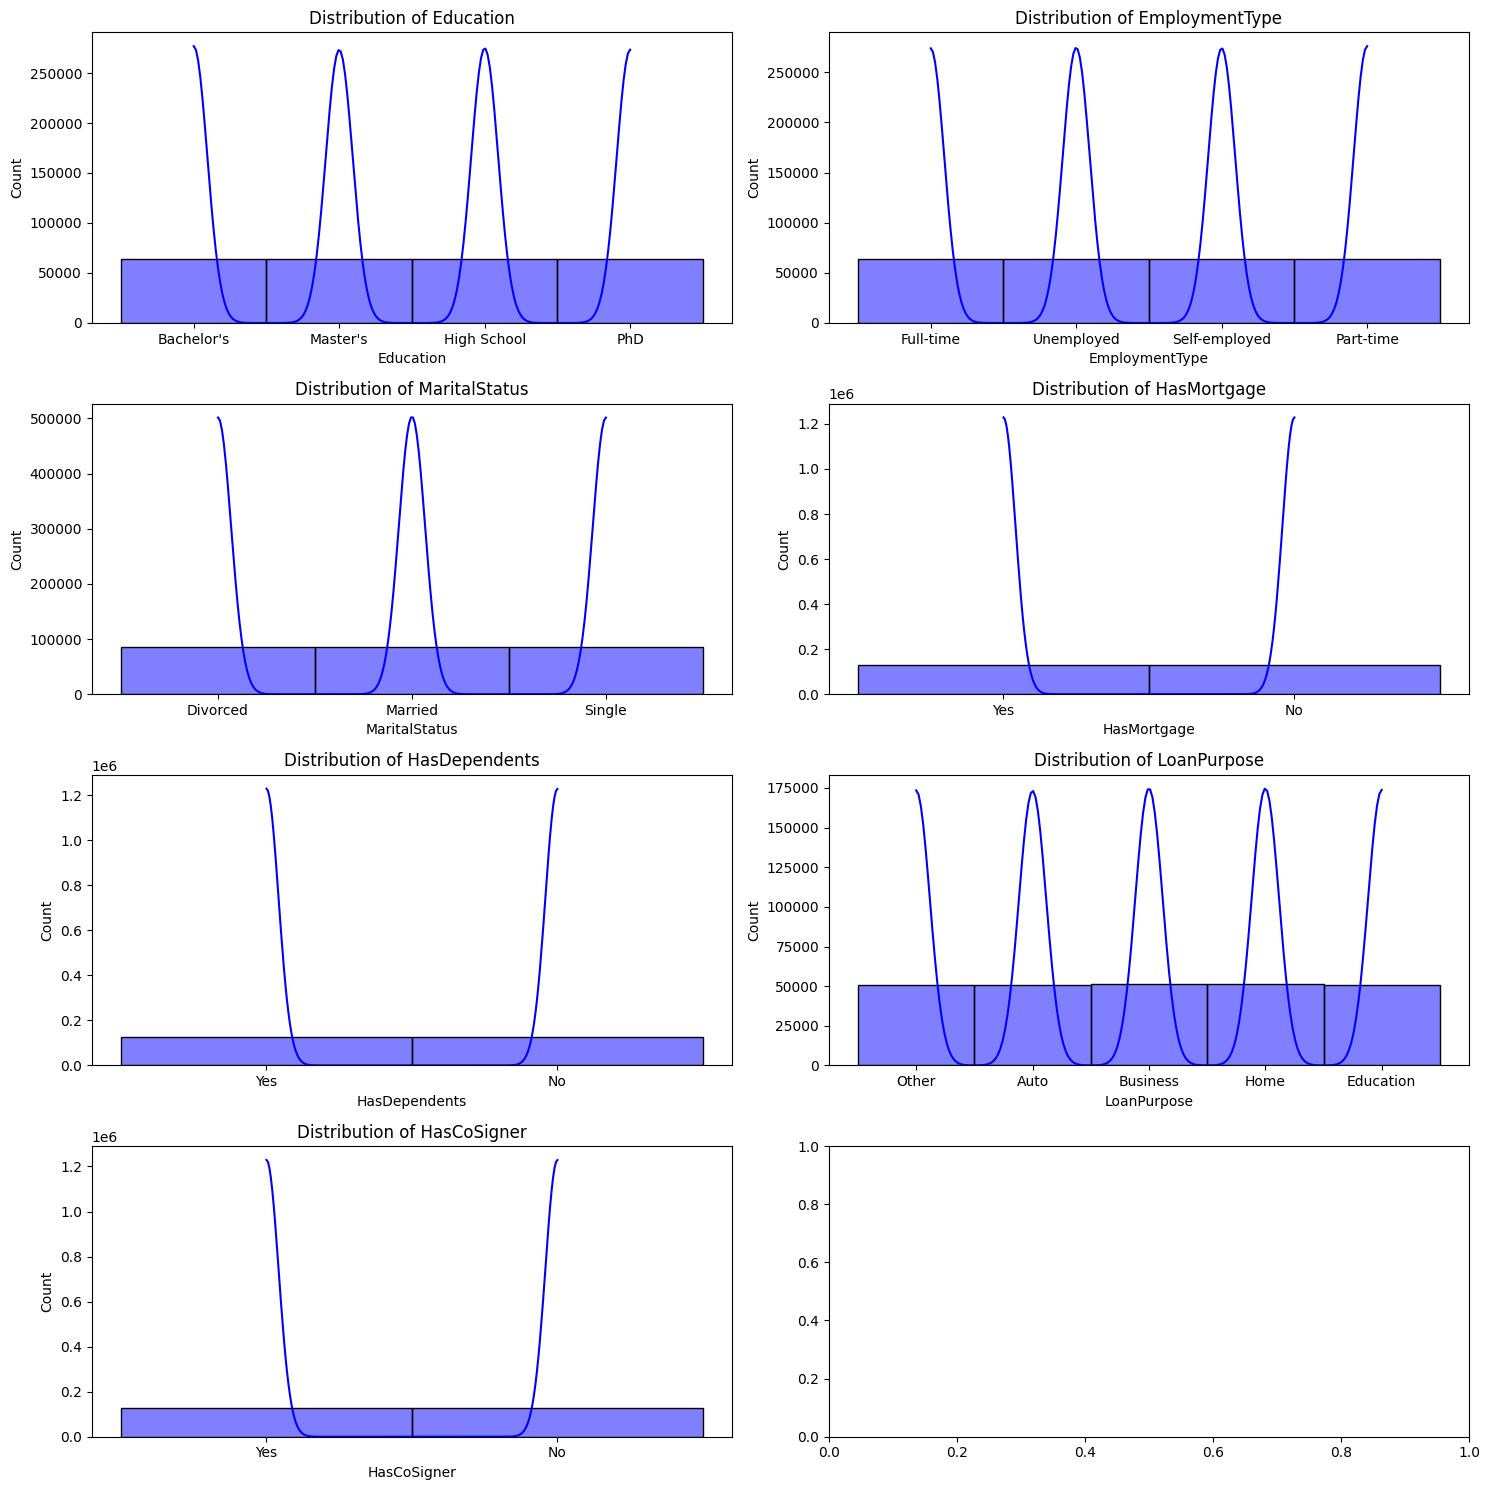

In [222]:
# To visualize all the numerical columns in one ploting

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

position = axes.flatten()

for index, column_name in enumerate(categorical_cols):
    sns.histplot(categorical_df[column_name], bins=30, color="blue", kde=True, ax=position[index])
    position[index].set_title(f"Distribution of {column_name}")
plt.tight_layout()
plt.show()

## Machine Learning Model

### Data Pre-processing

In [223]:
# Questions <===> Features
# Answers <====> Labels

In [224]:
# In Machine learning, we convert all categorical data into numerical form

In [225]:
data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [226]:
# we have to sepreate the features from the label

labels = data["Default"]

In [227]:
labels

0         0
1         0
2         1
3         0
4         0
         ..
255342    0
255343    1
255344    0
255345    0
255346    0
Name: Default, Length: 255347, dtype: int64

In [228]:
# seperate features columns from label/target column
# since its only one column, its best to drop it

features = data.drop("Default", axis=1)

In [229]:
features.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No


## Encoding categorical features/columns
#### This means converting categorical columns to numerical using Label Encoder

In [230]:
categorical_df.head()

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,Master's,Full-time,Married,No,No,Other,Yes
2,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,High School,Full-time,Married,No,No,Business,No
4,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No


In [231]:
# import important libraries for machine learning

from sklearn.preprocessing import LabelEncoder

In [232]:
# step 1, initiate the encoder

In [233]:
encoder = LabelEncoder()

## Two steps to encoder any data

### 1. fit
### 2. transform

In [234]:
# Here, lets encoder Education column/feature

encoder.fit(data["Education"])

LabelEncoder()

In [235]:
encoder.transform(data["Education"])

array([0, 2, 2, ..., 1, 1, 0])

In [236]:
# To check which od the numbers are assigned to which variable

encoder.inverse_transform([0,1,2,3,])

array(["Bachelor's", 'High School', "Master's", 'PhD'], dtype=object)

In [237]:
# To check education count

data["Education"].value_counts()

Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

In [238]:
# to do fit and transform with one line of code

encoder.fit_transform(data["Education"])

array([0, 2, 2, ..., 1, 1, 0])

In [239]:
encoder.fit_transform(data["EmploymentType"])

array([0, 0, 3, ..., 2, 1, 3])

In [240]:
# To check employment type

data["EmploymentType"].value_counts()

EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64

In [241]:
data.describe(include="object")

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
count,255347,255347,255347,255347,255347,255347,255347
unique,4,4,3,2,2,5,2
top,Bachelor's,Part-time,Married,Yes,Yes,Business,Yes
freq,64366,64161,85302,127677,127742,51298,127701


In [242]:
categorical_df.head()

,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes
1,Master's,Full-time,Married,No,No,Other,Yes
2,Master's,Unemployed,Divorced,Yes,Yes,Auto,No
3,High School,Full-time,Married,No,No,Business,No
4,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No


In [243]:
# check the names of the columns in the dataset

for column_name in categorical_df:
    print(column_name)

Education
EmploymentType
MaritalStatus
HasMortgage
HasDependents
LoanPurpose
HasCoSigner


In [244]:
# To convert categorical value to numerical form, use for loop function

for column_name in categorical_df:
    features[column_name] = encoder.fit_transform(features[column_name])

In [245]:
features.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0


## Data splitting 

In [246]:
# Split data into training model and testing model, the model will learn with training data and also test with testing data

In [247]:
# check the length of the features in the data
len(features)

255347

In [248]:
# check the length of the labels in the data
len(labels)

255347

In [249]:
# To split the data, we have to import important library

from sklearn.model_selection import train_test_split

In [250]:
data["Default"].value_counts()

Default
0    225694
1     29653
Name: count, dtype: int64

In [251]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

In [252]:
train_features

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
137187,18,137576,209136,846,26,2,10.47,60,0.81,1,2,2,1,0,1,0
230334,47,57194,5970,748,30,2,19.72,36,0.73,1,3,0,0,1,2,0
19687,26,84328,95065,453,7,2,24.25,12,0.45,2,2,1,0,0,4,1
106509,53,49795,229582,533,107,3,14.44,60,0.17,0,2,2,1,0,0,1
242291,49,115450,22072,840,0,4,24.48,12,0.11,0,1,2,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,40,116623,161673,651,79,2,23.44,12,0.87,0,1,0,0,0,3,1
103694,67,62958,189499,460,77,3,9.29,36,0.11,0,2,2,0,0,1,1
131932,62,34372,59645,524,94,3,9.72,60,0.24,3,0,2,1,0,0,0
146867,44,146262,198454,489,7,4,4.31,48,0.30,1,2,1,1,0,3,0


In [253]:
test_features

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
51139,55,112656,92393,581,113,2,23.54,36,0.15,3,2,2,1,1,3,0
71005,56,91569,131575,641,54,1,15.19,12,0.43,1,1,0,1,1,2,1
35684,26,78169,75417,569,105,3,18.02,12,0.29,2,1,1,1,1,2,1
174087,26,63033,10804,326,118,1,14.71,24,0.41,1,1,2,0,0,1,1
137952,24,29665,21182,662,102,3,15.02,60,0.69,3,3,2,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35991,51,99473,170353,628,24,1,17.03,12,0.46,3,2,0,1,1,0,1
69680,29,42016,111314,371,51,4,7.10,36,0.50,3,2,1,0,0,4,0
184743,67,88507,142666,731,51,1,22.89,48,0.79,0,1,0,0,0,2,0
209406,42,116649,190938,488,6,1,10.83,60,0.32,0,0,1,0,1,4,1


In [254]:
len(features)

255347

In [255]:
len(train_features)

204277

In [256]:
len(test_features)

51070

In [257]:
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

In [258]:
# To reduce the stress of typing long name, represent features and labels with x and y
# features <=====> X
# labels <=======> y


Xtrain, Xtest, ytrain, ytest = train_test_split(features, labels, test_size=0.2, random_state=42)

## Model Training

In [259]:
# we use Regresion when we are forcasting for a continous data, example sales forcast
# Use classification when forcasting for categorization of data.
# In this project, we are using classification since we are forcasting if an applicant will default in loan repayment or not

In [260]:
# Logistic Regression

In [261]:
from sklearn.linear_model import LogisticRegression

In [262]:
# step 1: is to initialize the model

model = LogisticRegression(random_state=42)

In [263]:
# step 2: is to train the model

model.fit(Xtrain, ytrain)

C:\Users\ubahl\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [264]:
# step 3: prediction

predictions = model.predict(Xtest)

In [265]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [266]:
ytest.values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [267]:
Xtest

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
51139,55,112656,92393,581,113,2,23.54,36,0.15,3,2,2,1,1,3,0
71005,56,91569,131575,641,54,1,15.19,12,0.43,1,1,0,1,1,2,1
35684,26,78169,75417,569,105,3,18.02,12,0.29,2,1,1,1,1,2,1
174087,26,63033,10804,326,118,1,14.71,24,0.41,1,1,2,0,0,1,1
137952,24,29665,21182,662,102,3,15.02,60,0.69,3,3,2,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35991,51,99473,170353,628,24,1,17.03,12,0.46,3,2,0,1,1,0,1
69680,29,42016,111314,371,51,4,7.10,36,0.50,3,2,1,0,0,4,0
184743,67,88507,142666,731,51,1,22.89,48,0.79,0,1,0,0,0,2,0
209406,42,116649,190938,488,6,1,10.83,60,0.32,0,0,1,0,1,4,1


In [268]:
# Import classification library and confusion matrix

In [269]:
from sklearn.metrics import classification_report, confusion_matrix

In [270]:
report = classification_report(ytest, predictions, digits=5)
matrix = confusion_matrix(ytest, predictions)

In [271]:
print(report)

              precision    recall  f1-score   support

           0    0.88456   0.99998   0.93873     45170
           1    0.83333   0.00085   0.00169      5900

    accuracy                        0.88455     51070
   macro avg    0.85894   0.50041   0.47021     51070
weighted avg    0.87864   0.88455   0.83048     51070



<Axes: >

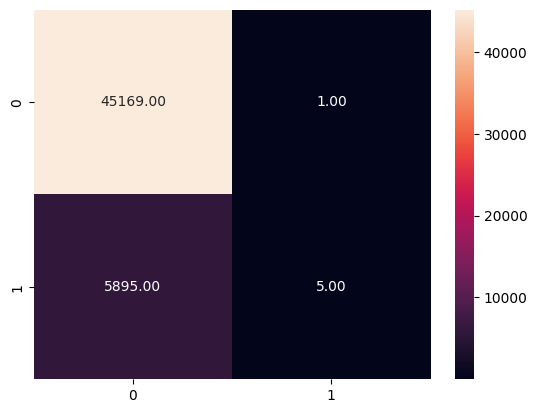

In [272]:
sns.heatmap(matrix, annot=True, fmt=".2f")

In [273]:
# To scale the data

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [274]:
# The dataset is uniformly distributed, so we are going to use MinMaxScaler to scale the features/columns
# if the dataset is normal distribution, then we can use standardScaler
# RobustScaler <=====> when you are unsure of the distribution

In [275]:
scaler = MinMaxScaler()

In [276]:
Xtrain_scaled = scaler.fit_transform(Xtrain)

In [277]:
Xtest_scaled = scaler.transform(Xtest)

In [278]:
# Initialize the model again

model = LogisticRegression(random_state=42)
# Training
model.fit(Xtrain_scaled, ytrain)

LogisticRegression(random_state=42)

In [279]:
# Prediction
predictions = model.predict(Xtest_scaled)

In [280]:
report = classification_report(ytest, predictions, digits=5)
matrix = confusion_matrix(ytest, predictions)

In [281]:
print(report)

              precision    recall  f1-score   support

           0    0.88741   0.99752   0.93925     45170
           1    0.62034   0.03102   0.05908      5900

    accuracy                        0.88586     51070
   macro avg    0.75387   0.51427   0.49916     51070
weighted avg    0.85655   0.88586   0.83756     51070



<Axes: >

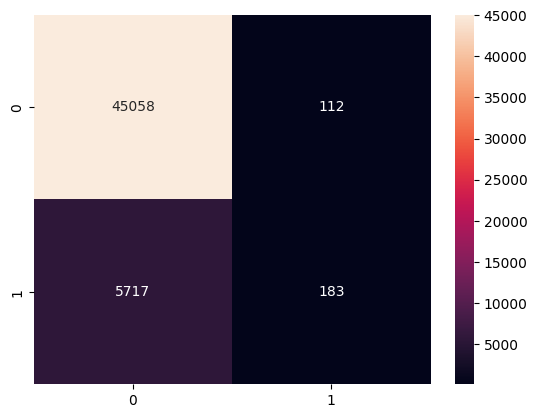

In [282]:
sns.heatmap(matrix, annot=True, fmt="g")

In [283]:
# Improving the model from the model size

              precision    recall  f1-score   support

           0    0.92052   0.87379   0.89654     45170
           1    0.30416   0.42237   0.35365      5900

    accuracy                        0.82164     51070
   macro avg    0.61234   0.64808   0.62510     51070
weighted avg    0.84931   0.82164   0.83382     51070



<Axes: >

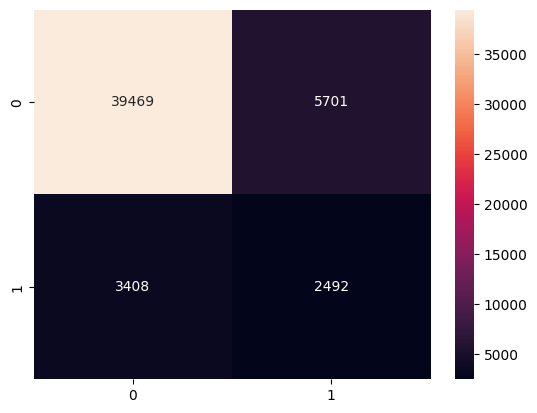

In [284]:
# Initialize the model again

model = LogisticRegression(random_state=42, class_weight={0:1, 1:4})
# Training
model.fit(Xtrain_scaled, ytrain)
# Prediction
predictions = model.predict(Xtest_scaled)
report = classification_report(ytest, predictions, digits=5)
print(report)
matrix = confusion_matrix(ytest, predictions)
sns.heatmap(matrix, annot=True, fmt="g")

## improve the model performance

In [286]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [299]:
classifiers = [
    [LogisticRegression(random_state=42, class_weight={0:1, 1:4}), "Logistic Regression"],
    [SGDClassifier(random_state=42, class_weight={0:1, 1:4}), "SGD Classifer"],
    [DecisionTreeClassifier(random_state=42, class_weight={0:1, 1:4}), "Decision tree"],
    [RandomForestClassifier(random_state=42, class_weight={0:1, 1:4}), "Random Forest"],
    ]

In [300]:
classifiers

[[LogisticRegression(class_weight={0: 1, 1: 4}, random_state=42),
  'Logistic Regression'],
 [SGDClassifier(class_weight={0: 1, 1: 4}, random_state=42), 'SGD Classifer'],
 [DecisionTreeClassifier(class_weight={0: 1, 1: 4}, random_state=42),
  'Decision tree'],
 [RandomForestClassifier(class_weight={0: 1, 1: 4}, random_state=42),
  'Random Forest']]

<---Logistic Regression--->
              precision    recall  f1-score   support

           0    0.92052   0.87379   0.89654     45170
           1    0.30416   0.42237   0.35365      5900

    accuracy                        0.82164     51070
   macro avg    0.61234   0.64808   0.62510     51070
weighted avg    0.84931   0.82164   0.83382     51070



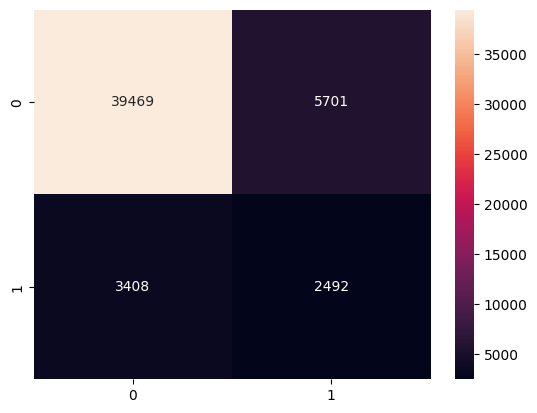

<---SGD Classifer--->
              precision    recall  f1-score   support

           0    0.92563   0.84062   0.88108     45170
           1    0.28354   0.48288   0.35729      5900

    accuracy                        0.79930     51070
   macro avg    0.60458   0.66175   0.61918     51070
weighted avg    0.85145   0.79930   0.82057     51070



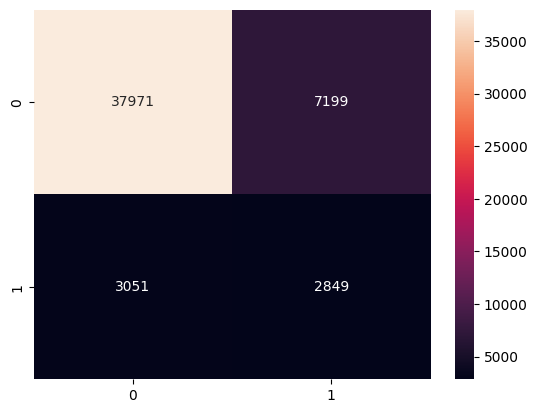

<---Decision tree--->
              precision    recall  f1-score   support

           0    0.89520   0.89219   0.89369     45170
           1    0.19531   0.20034   0.19779      5900

    accuracy                        0.81226     51070
   macro avg    0.54525   0.54626   0.54574     51070
weighted avg    0.81434   0.81226   0.81329     51070



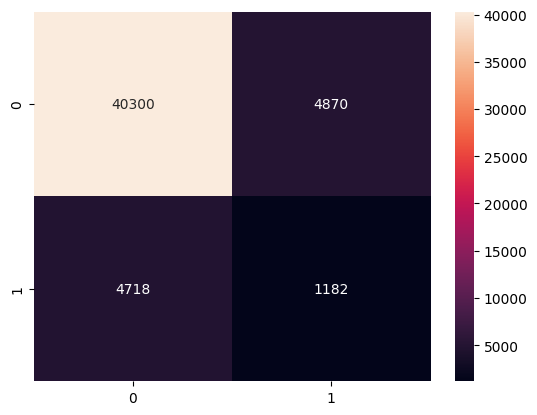

<---Random Forest--->
              precision    recall  f1-score   support

           0    0.88749   0.99763   0.93934     45170
           1    0.63605   0.03169   0.06038      5900

    accuracy                        0.88604     51070
   macro avg    0.76177   0.51466   0.49986     51070
weighted avg    0.85844   0.88604   0.83780     51070



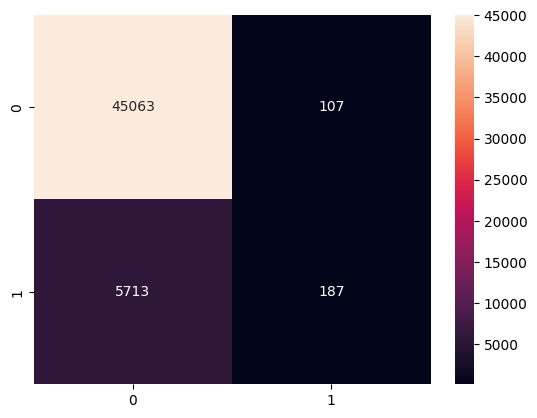

In [302]:
for classifier in classifiers:
    model = classifier[0]
    model_name = classifier[1]
    print(f"<---{model_name}--->")
    # Training
    model.fit(Xtrain_scaled, ytrain)
    # Prediction
    predictions = model.predict(Xtest_scaled)
    report = classification_report(ytest, predictions, digits=5)
    print(report)
    matrix = confusion_matrix(ytest, predictions)
    sns.heatmap(matrix, annot=True, fmt="g")
    plt.show()

In [296]:
Xtrain.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
137187,18,137576,209136,846,26,2,10.47,60,0.81,1,2,2,1,0,1,0
230334,47,57194,5970,748,30,2,19.72,36,0.73,1,3,0,0,1,2,0
19687,26,84328,95065,453,7,2,24.25,12,0.45,2,2,1,0,0,4,1
106509,53,49795,229582,533,107,3,14.44,60,0.17,0,2,2,1,0,0,1
242291,49,115450,22072,840,0,4,24.48,12,0.11,0,1,2,0,1,2,1


## Feature Importance

In [303]:
classifiers[3][0]

RandomForestClassifier(class_weight={0: 1, 1: 4}, random_state=42)

In [306]:
classifiers[3][0].feature_importances_

array([0.12346932, 0.13011049, 0.11530581, 0.09621592, 0.10052636,
       0.0294051 , 0.13167643, 0.03562807, 0.08444316, 0.02935622,
       0.0285231 , 0.02304097, 0.01337598, 0.01225826, 0.035622  ,
       0.0110428 ])

In [311]:
feature_names = Xtrain.columns

In [312]:
importances = classifiers[3][0].feature_importances_

In [313]:
feature_importance_df = pd.DataFrame({"features":feature_names, "importance":importances})

In [314]:
feature_importance_df

,features,importance
0,Age,0.123469
1,Income,0.130110
2,LoanAmount,0.115306
3,CreditScore,0.096216
4,MonthsEmployed,0.100526
5,NumCreditLines,0.029405
6,InterestRate,0.131676
7,LoanTerm,0.035628
8,DTIRatio,0.084443
9,Education,0.029356


In [315]:
feature_importance_df = feature_importance_df.sort_values(by="importance", ascending=False)

In [316]:
feature_importance_df

,features,importance
6,InterestRate,0.131676
1,Income,0.130110
0,Age,0.123469
2,LoanAmount,0.115306
4,MonthsEmployed,0.100526
3,CreditScore,0.096216
8,DTIRatio,0.084443
7,LoanTerm,0.035628
14,LoanPurpose,0.035622
5,NumCreditLines,0.029405


<Axes: xlabel='importance', ylabel='features'>

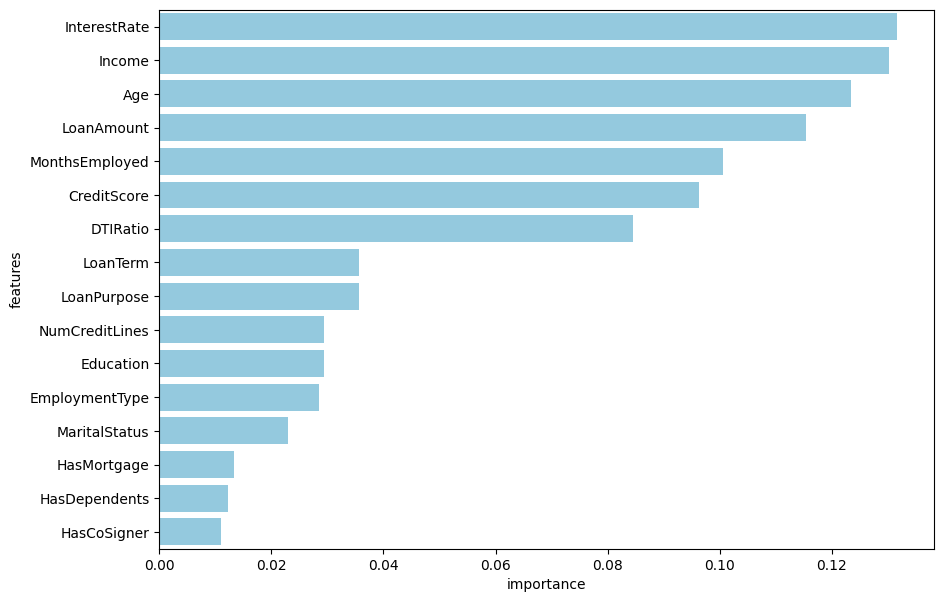

In [320]:
plt.figure(figsize=(10,7))
sns.barplot(x="importance", y="features", data=feature_importance_df, color="skyblue")

# lets select the top five features

In [324]:
top_5_features = list(feature_importance_df[:5]["features"].values)

In [325]:
top_5_features

['InterestRate', 'Income', 'Age', 'LoanAmount', 'MonthsEmployed']

In [326]:
Xtrain[top_5_features]

,InterestRate,Income,Age,LoanAmount,MonthsEmployed
137187,10.47,137576,18,209136,26
230334,19.72,57194,47,5970,30
19687,24.25,84328,26,95065,7
106509,14.44,49795,53,229582,107
242291,24.48,115450,49,22072,0
...,...,...,...,...,...
119879,23.44,116623,40,161673,79
103694,9.29,62958,67,189499,77
131932,9.72,34372,62,59645,94
146867,4.31,146262,44,198454,7


In [327]:
Xtrain_top_5 = Xtrain[top_5_features]
Xtest_top_5 = Xtest[top_5_features]

In [328]:
Xtrain_top_5.head()

,InterestRate,Income,Age,LoanAmount,MonthsEmployed
137187,10.47,137576,18,209136,26
230334,19.72,57194,47,5970,30
19687,24.25,84328,26,95065,7
106509,14.44,49795,53,229582,107
242291,24.48,115450,49,22072,0


In [329]:
# Scale the data

scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain_top_5)
Xtest_scaled = scaler.transform(Xtest_top_5)

<---Logistic Regression--->
              precision    recall  f1-score   support

           0    0.91842   0.87507   0.89622     45170
           1    0.29744   0.40492   0.34295      5900

    accuracy                        0.82076     51070
   macro avg    0.60793   0.63999   0.61959     51070
weighted avg    0.84668   0.82076   0.83230     51070



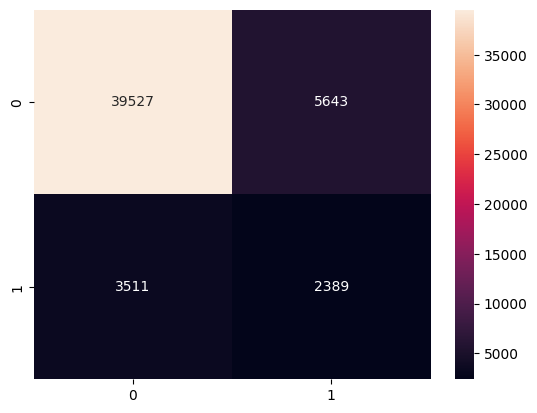

<---SGD Classifer--->
              precision    recall  f1-score   support

           0    0.91767   0.87943   0.89814     45170
           1    0.30018   0.39593   0.34147      5900

    accuracy                        0.82358     51070
   macro avg    0.60892   0.63768   0.61981     51070
weighted avg    0.84633   0.82358   0.83383     51070



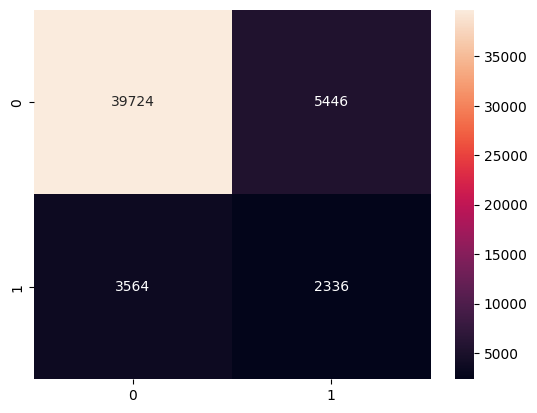

<---Decision tree--->
              precision    recall  f1-score   support

           0    0.89502   0.89351   0.89427     45170
           1    0.19511   0.19763   0.19636      5900

    accuracy                        0.81312     51070
   macro avg    0.54507   0.54557   0.54531     51070
weighted avg    0.81416   0.81312   0.81364     51070



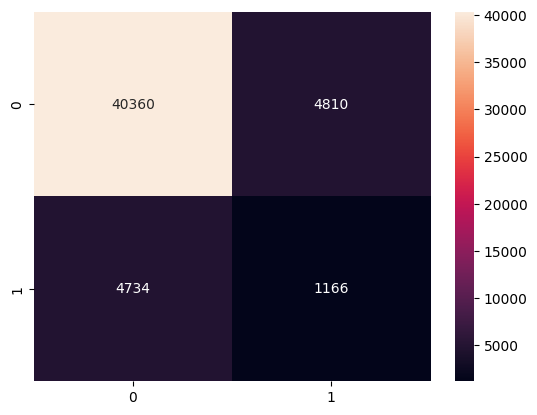

<---Random Forest--->
              precision    recall  f1-score   support

           0    0.88921   0.99331   0.93839     45170
           1    0.50654   0.05254   0.09521      5900

    accuracy                        0.88463     51070
   macro avg    0.69788   0.52293   0.51680     51070
weighted avg    0.84500   0.88463   0.84098     51070



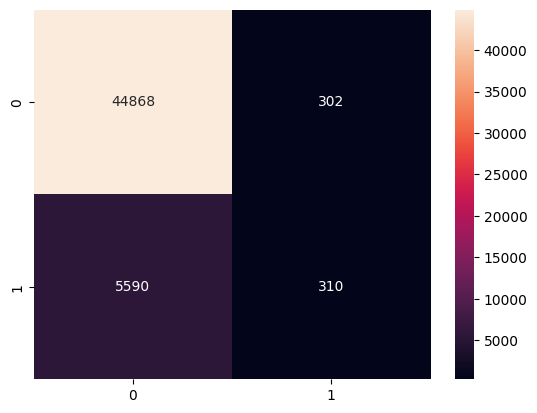

In [330]:
for classifier in classifiers:
    model = classifier[0]
    model_name = classifier[1]
    print(f"<---{model_name}--->")
    # Training
    model.fit(Xtrain_scaled, ytrain)
    # Prediction
    predictions = model.predict(Xtest_scaled)
    report = classification_report(ytest, predictions, digits=5)
    print(report)
    matrix = confusion_matrix(ytest, predictions)
    sns.heatmap(matrix, annot=True, fmt="g")
    plt.show()